# Import module & package

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix

# Import dataset

In [81]:
dataset_train = pd.read_csv('E:\Data Science\Python\project data science\FGA KOMINFO final_project\data_set\Data Train.csv')

In [82]:
dataset_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [83]:
dataset_train.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


# Exploratory data analysis
    1. Data Cleanning & Preprocessing : Proses membersihkan data dan memastikan bahwa data sudah akurat dan siap dilakukan analisis. 
    2. Data Exploration : Proses menggali informasi/insight dari data untuk mengidentifikasi pola dari data. 
    3. Feature Engineering : Proses menambahkan, membuang atau merubah fitur dari data agar lebih merepresentasikan pola yang mendasari data. 
    4. Model Selection : Pemilihan model yang cocok dan menghasilkan hasil prediksi yang terbaik. 

In [84]:
dataset_train.shape

(4250, 20)

In [85]:
# Check data types for each columns
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [86]:
# Check duplicate data
dataset_train.duplicated().sum()

0

In [87]:
# Create function to explore the data
def check_mydata(dataframe: pd.DataFrame):

    new_col = {
        'col_name': [],
        'null_pct': [],
        'data_type': [],
        'unique_values': [],
        'unique_values_count': [],
        'mean_med_std': []
    }

    for col in dataframe.columns:
        new_col['col_name'].append(col)
        new_col['null_pct'].append(dataframe[col].isna().sum() / dataframe[col].shape[0] * 100) 
        new_col['data_type'].append(dataframe[col].dtypes)
        (dataframe[col].unique())
        if dataframe[col].dtypes == 'object':
            new_col['unique_values'].append(dataframe[col].unique())
            new_col['unique_values_count'].append(dataframe[col].nunique())
            new_col['mean_med_std'].append('-')

        else:
            new_col['unique_values'].append('-')
            new_col['unique_values_count'].append('-')
            mean = round(dataframe[col].mean(), 2)
            median = round(dataframe[col].median(), 2)
            std = round(dataframe[col].std(), 2)
            new_col['mean_med_std'].append((mean, median, std))

    return pd.DataFrame(data=new_col)

In [88]:
check_mydata(dataset_train)

,col_name,null_pct,data_type,unique_values,unique_values_count,mean_med_std
0,state,0.0,object,"[OH, NJ, OK, MA, MO, LA, WV, IN, RI, IA, MT, N...",51,-
1,account_length,0.0,int64,-,-,"(100.24, 100.0, 39.7)"
2,area_code,0.0,object,"[area_code_415, area_code_408, area_code_510]",3,-
3,international_plan,0.0,object,"[no, yes]",2,-
4,voice_mail_plan,0.0,object,"[yes, no]",2,-
5,number_vmail_messages,0.0,int64,-,-,"(7.63, 0.0, 13.44)"
6,total_day_minutes,0.0,float64,-,-,"(180.26, 180.45, 54.01)"
7,total_day_calls,0.0,int64,-,-,"(99.91, 100.0, 19.85)"
8,total_day_charge,0.0,float64,-,-,"(30.64, 30.68, 9.18)"
9,total_eve_minutes,0.0,float64,-,-,"(200.17, 200.7, 50.25)"


- tidak ada data yang duplicate, serta tidak ada data yang memiliki nilai null/kosong pada dataframe sehingga tidak perlu melakukan data cleanning

## Data Exploration

### Univariate analysis

In [89]:
# Analysis target prediciton
dataset_train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

In [90]:
dataset_train['churn'] = dataset_train['churn'].replace({'yes': 1, 'no':0})

In [91]:
chrun_prop = dataset_train['churn'].value_counts().to_frame()
fig = px.bar(data_frame=chrun_prop, x=chrun_prop.index, y='churn', color=['Not_churn', 'Churn'])
fig.update_layout(
    width=700, 
    height=600, 
    legend=dict(title=' '),
    xaxis=dict(tickvals=[0,1], ticktext=['Not Churn', 'Churn'], title='Status', title_font=dict(size=20)),
    yaxis=dict(title='Total Counts', title_font=dict(size=20))
)
fig.update_traces(
    hovertemplate='Status: %{x}<br>Total Counts: %{y}',
)
fig.show()

- Rasio antra jumlah customer churn dan not churn pada grafik diatas terlihat jelas ada perbedaan yang sangat signifikan (data imbalance). Hal ini akan sangat berpengaruh pada hasil prediksi model machine learning nantinya, oleh karena itu pada tahapan pembuatan model nantinya kita akan melakukan penyeimbangan terhadap data yang tidak seimbangan ini dengan menggenerate data sintesis. Hal ini dapat dilakukan dengan menggunakan SMOTE Method/ Random Over Sampling.

In [92]:
# Analysis categorical data
dataset_train.describe(exclude=['float', 'int'])

,state,area_code,international_plan,voice_mail_plan
count,4250,4250,4250,4250
unique,51,3,2,2
top,WV,area_code_415,no,no
freq,139,2108,3854,3138


- Fungsi describe() digunakan untuk menampilkan insight dari data numerik ataupun kategorik, atau selain itu kita bisa membuat sebuah datframe baru menyesuaikan dengan kebutuhan terkait insight apa yang ingin ditelusuri dari data tersebut.

In [93]:
# Analysis categorical data values
categorical_col = [col for col in dataset_train.columns if dataset_train[col].dtypes == 'object']

for col in categorical_col:
    temp_data = dataset_train[col].value_counts().to_frame()
    if col == 'state':
        fig = px.bar(data_frame=temp_data, x=temp_data.index, y=col)
        tickangle=45
    else:
        fig = px.bar(data_frame=temp_data, x=temp_data.index, y=col, color=temp_data.index)
        tickangle=0
    fig.update_layout(
        width=700, 
        height=600, 
        legend=dict(title=' ', ),
        xaxis_tickangle=tickangle,
        xaxis=dict(title=col, title_font=dict(size=20)),
        yaxis=dict(title='Total Counts', title_font=dict(size=20))
    )
    fig.update_traces(
        hovertemplate='Type: %{x}<br>Total Counts: %{y}',
    )
    fig.show()

- Jumlah total pengguna terbanyak dari provider telekomunikasi yang sedang dilakukan analysis adalah negara dengan state_code : WV
Sedangkan total pengguna yang paling sedikit ada di negara dengan state_code : CA.

- Insight berikutnya yang kita dapatkan adalah, ternyata sebaran jumlah pengguna provider telekomunikasi yang sedang dianalisa terbanyak ada pada area code 415, sendangkan pada area code lainnya memiliki perbedaan yang tidak terlalu signifikan antara satu sama lain.

- Lalu untuk total keseluruhan pengguna ternyata hanya sebgaian kecil yang menggunakan jenis layanan international plan dan juga hanya sebagian kecil yang menggunakan jenis layanan voice mail plan.

### Bivariate data analysis

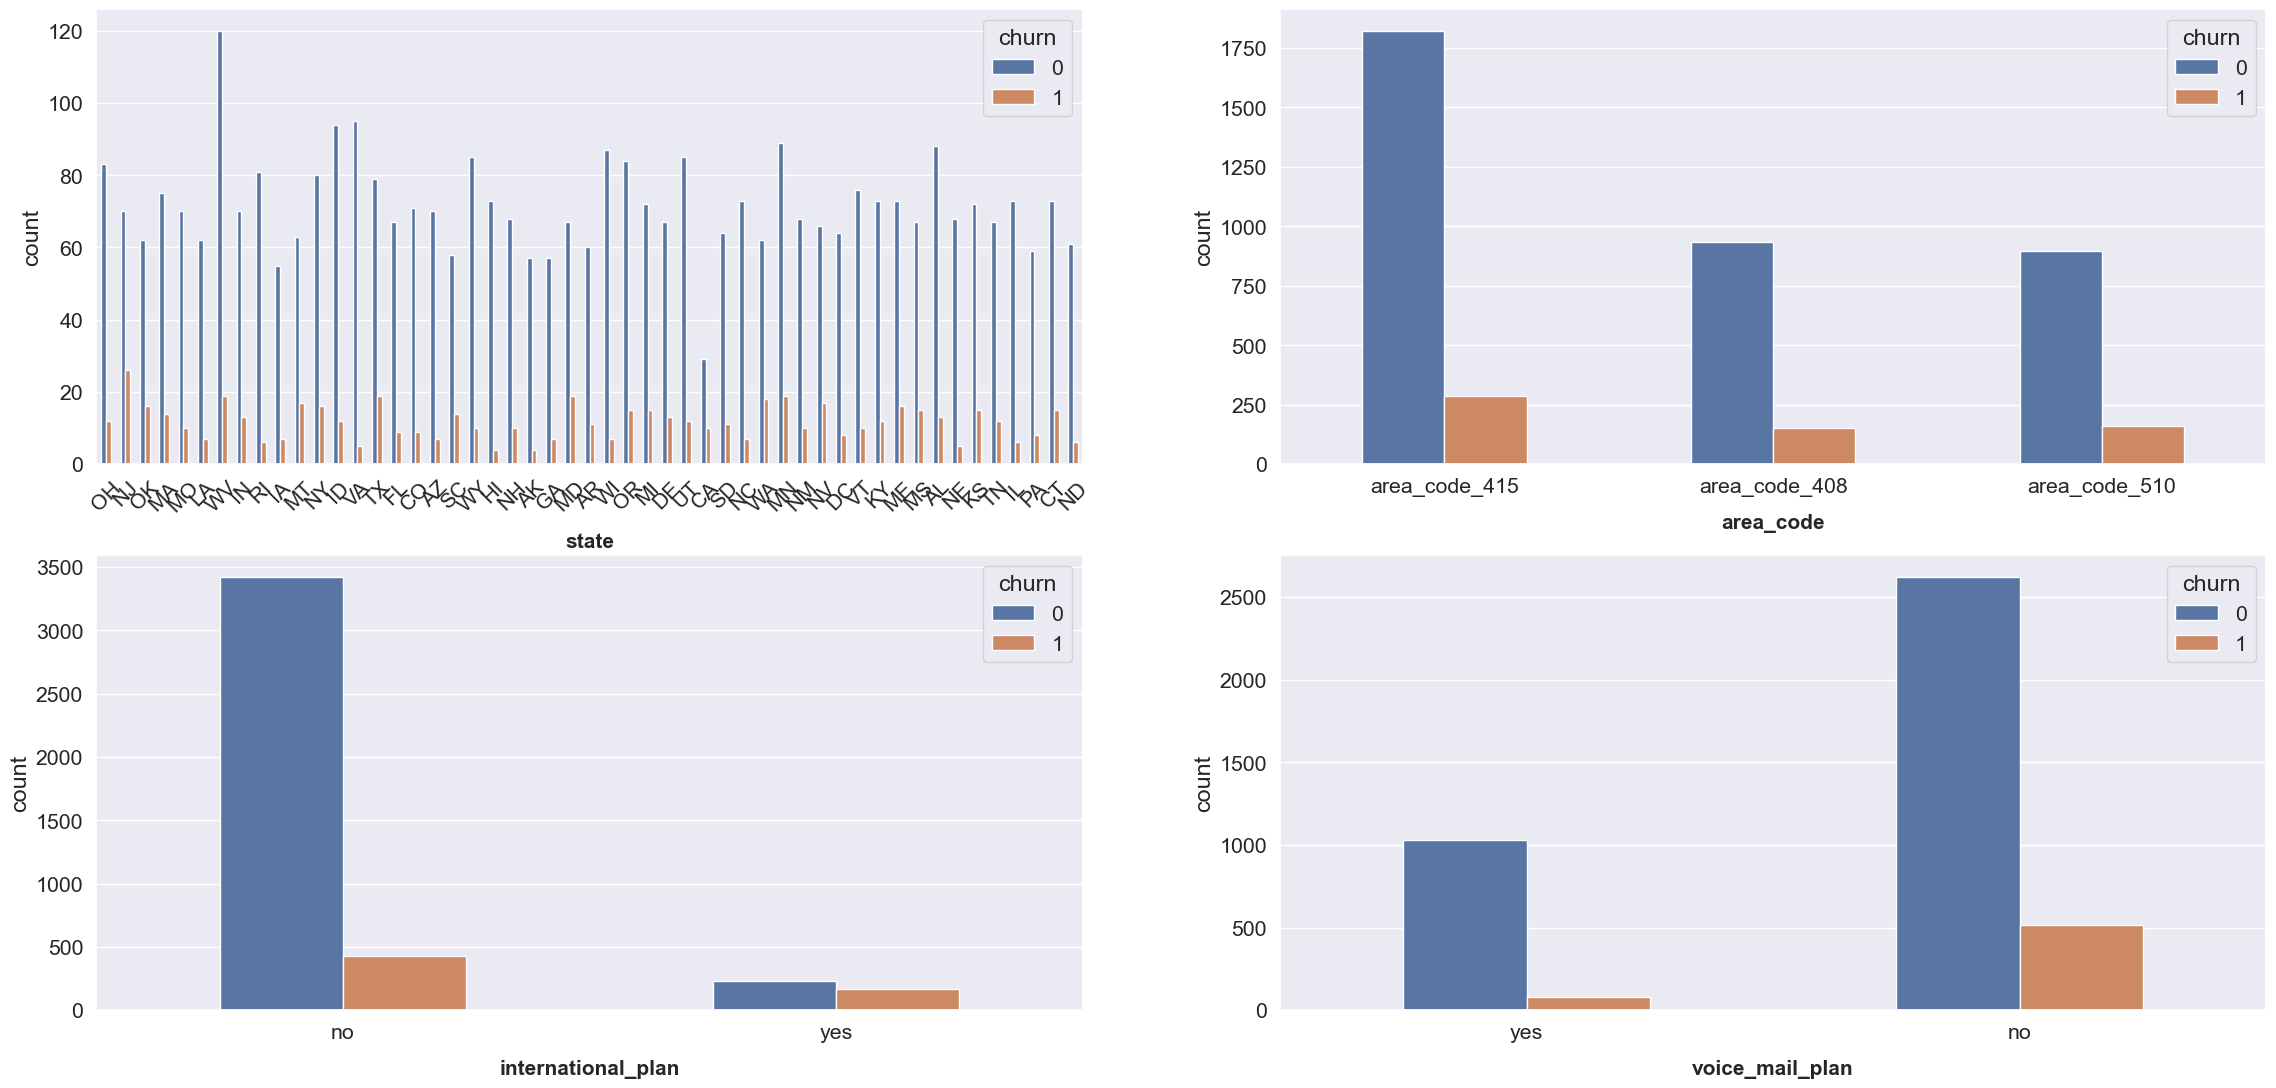

In [94]:
# Analysis categorical values with target prediciton
categorical_col.append('churn')
temp_data = dataset_train[categorical_col]

num = 1

plt.figure(figsize=(28, 13))
for col in categorical_col[0:-1]:
    plt.subplot(2, 2, num)
    sns.countplot(data=temp_data, x=col , hue='churn', width=0.5)
    plt.xlabel(xlabel=col, fontdict=dict(fontsize=15, fontweight='heavy'), labelpad=12)
    if col == 'state':
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    num+=1

categorical_col.remove('churn')

- Melalui proses analisis univariate dan bivariate analysis kita mendapatkan insight yang lebih spesifik terkait customer yang mempunyai resiko untuk churn dan tidak chrun berdasarkan kategori lokasi, area, dan jenis layanan dari masing-masing tipe customer. Jika dilihat dari visualisasi distribusi dari kolom kategorik tersebut jenis data per kategori terlihat uniform atau seragam sehingga kurang cocok untuk dimasukan kedalam machine learning model, karena pola yang ada per kategori hampir mirip2, namun untuk memutuskan apakah akan dimasukan kedalam model atau tidak akan dilakukan perhitungan lebih lanjut dengn metode WoE dan Iformation Valu.

In [95]:
numerical_col = dataset_train.columns.to_list()

for col in categorical_col:
    numerical_col.remove(col)
    print(col)

print(numerical_col, len(numerical_col))

state
area_code
international_plan
voice_mail_plan
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn'] 16


In [96]:
temp_data = dataset_train[numerical_col]
temp_data.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


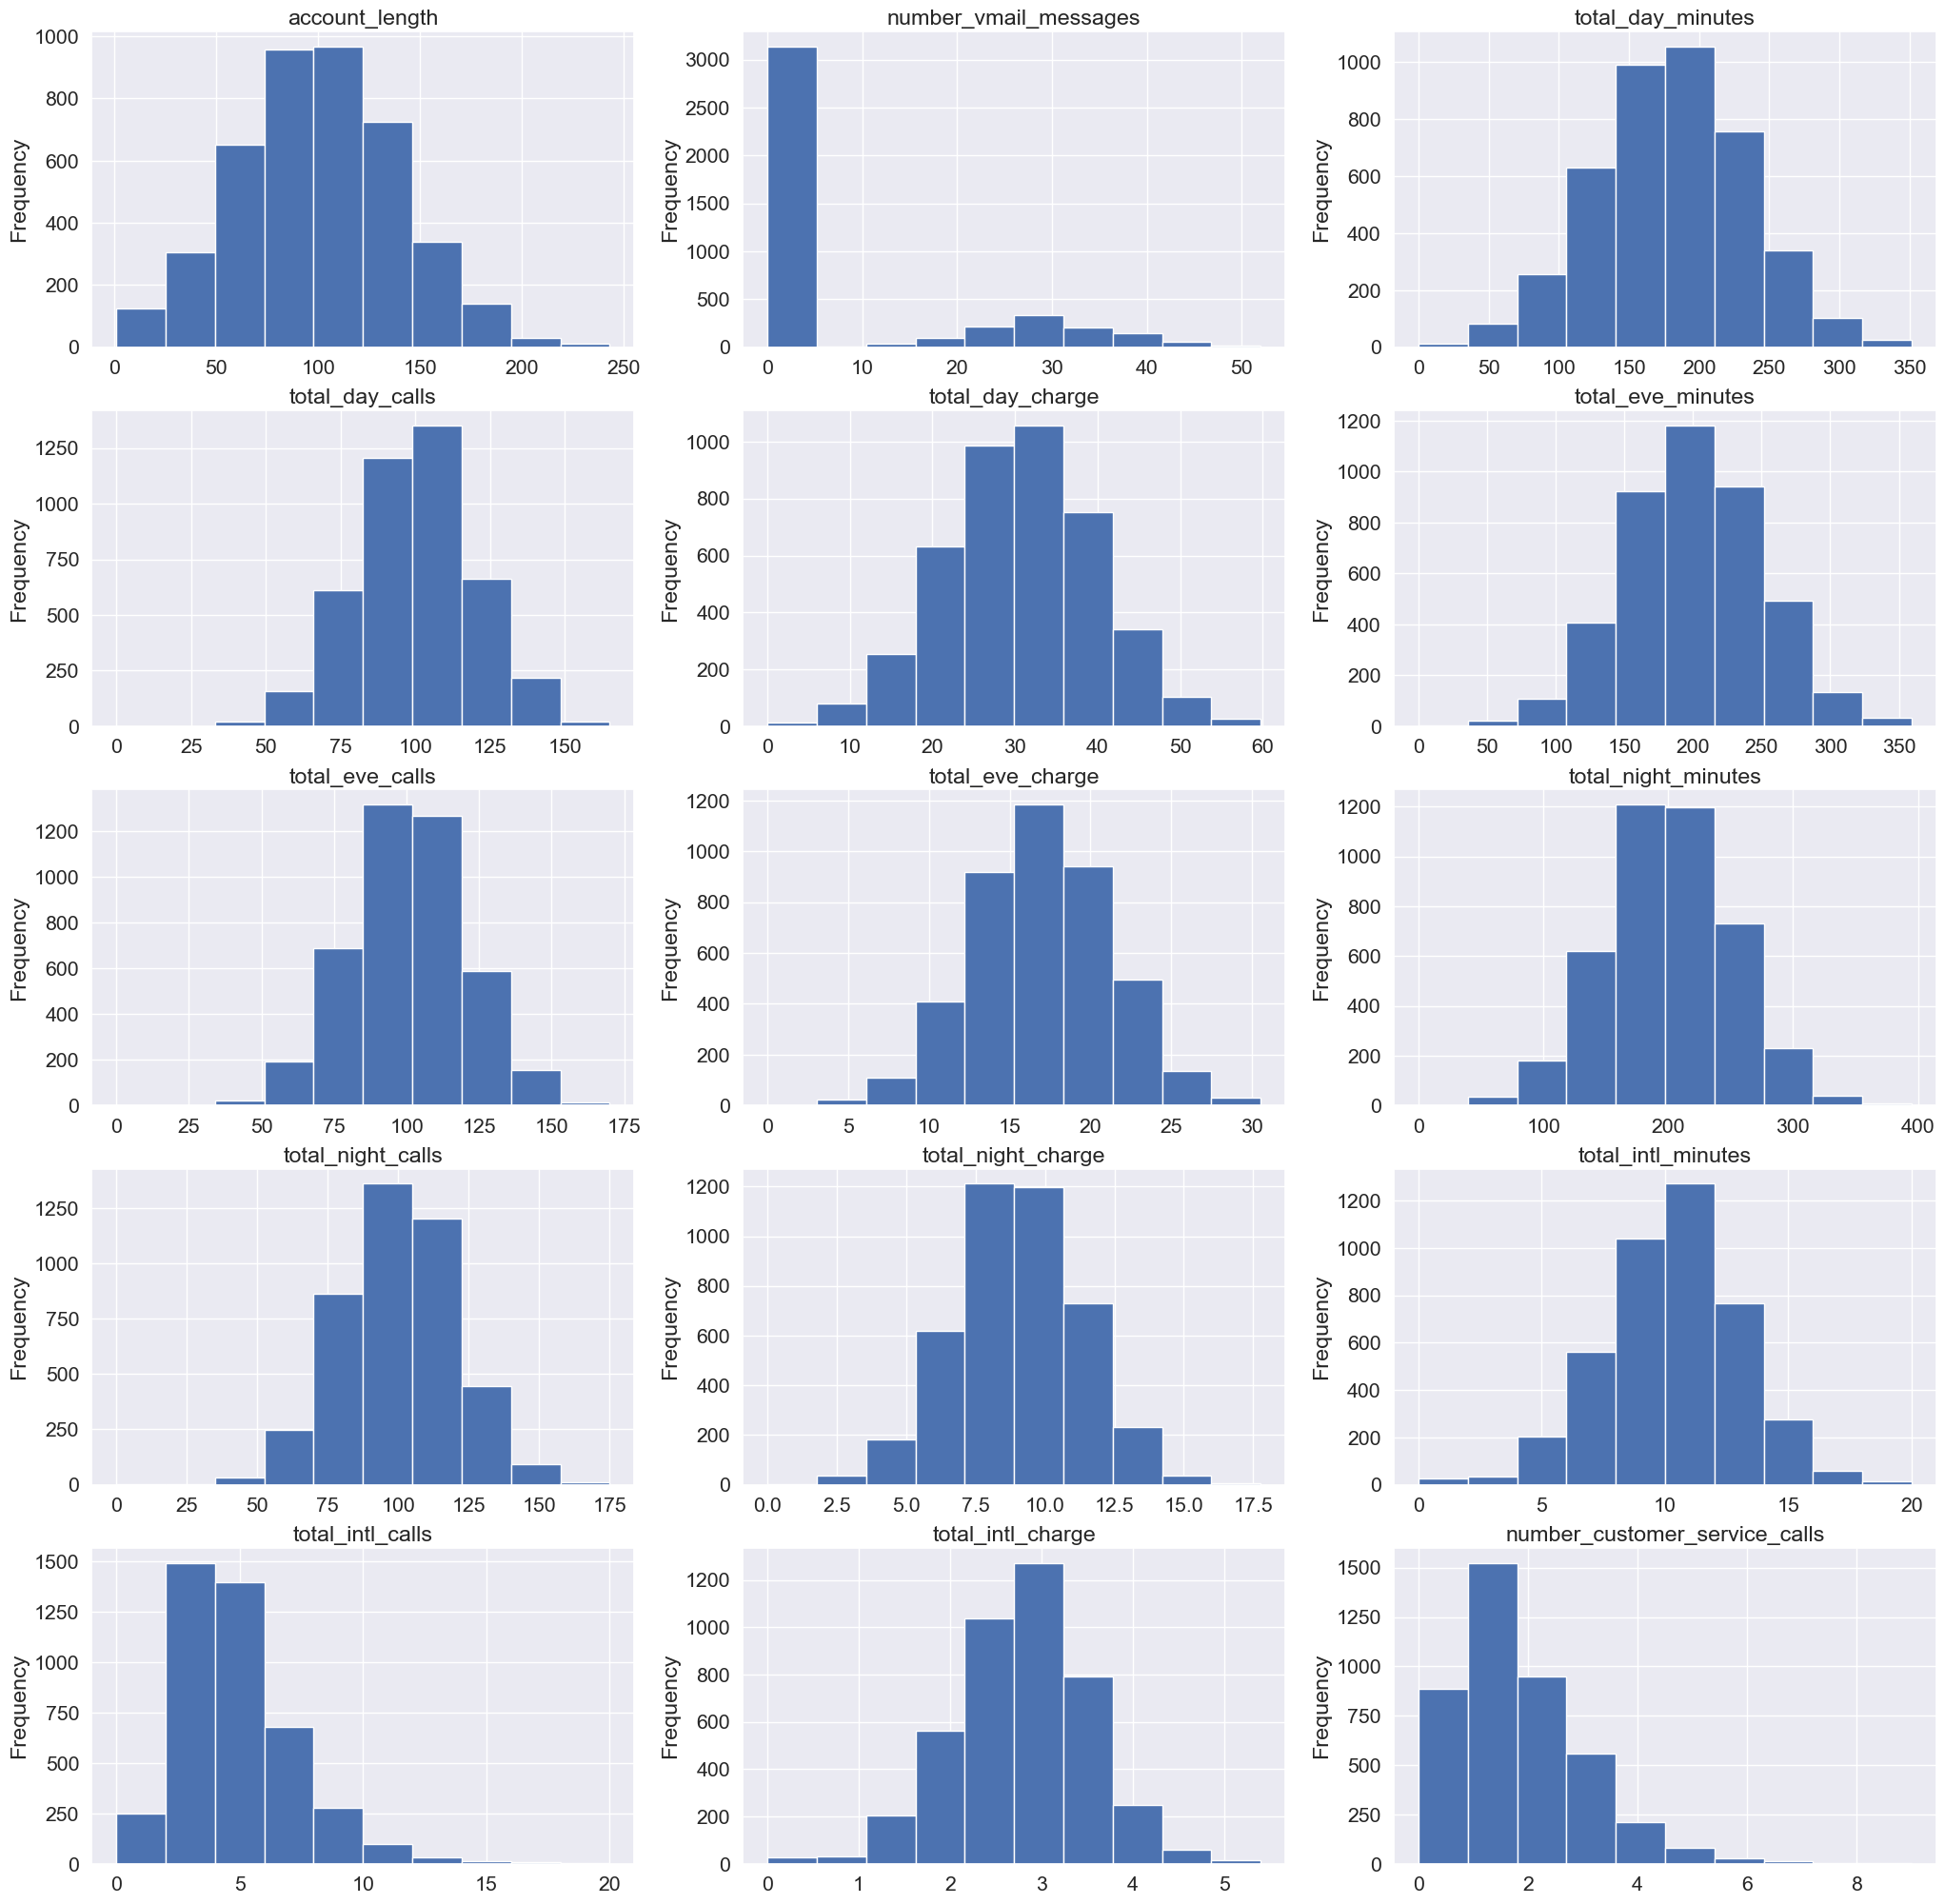

In [97]:
# Analysis numerical data
# Check data distribution
num = 1
plt.figure(figsize=(25, 25))
for col in numerical_col[0:-1]:
    plt.subplot(5, 3, num)
    temp_data[col].plot(kind='hist')
    plt.title(col, pad=5)
    num+=1


In [98]:
dataset_train[numerical_col[:-1]].skew()

account_length                   0.122327
number_vmail_messages            1.373091
total_day_minutes               -0.006910
total_day_calls                 -0.085812
total_day_charge                -0.006913
total_eve_minutes               -0.030415
total_eve_calls                 -0.020812
total_eve_charge                -0.030388
total_night_minutes              0.008491
total_night_calls                0.005273
total_night_charge               0.008445
total_intl_minutes              -0.241360
total_intl_calls                 1.360122
total_intl_charge               -0.241671
number_customer_service_calls    1.082692
dtype: float64

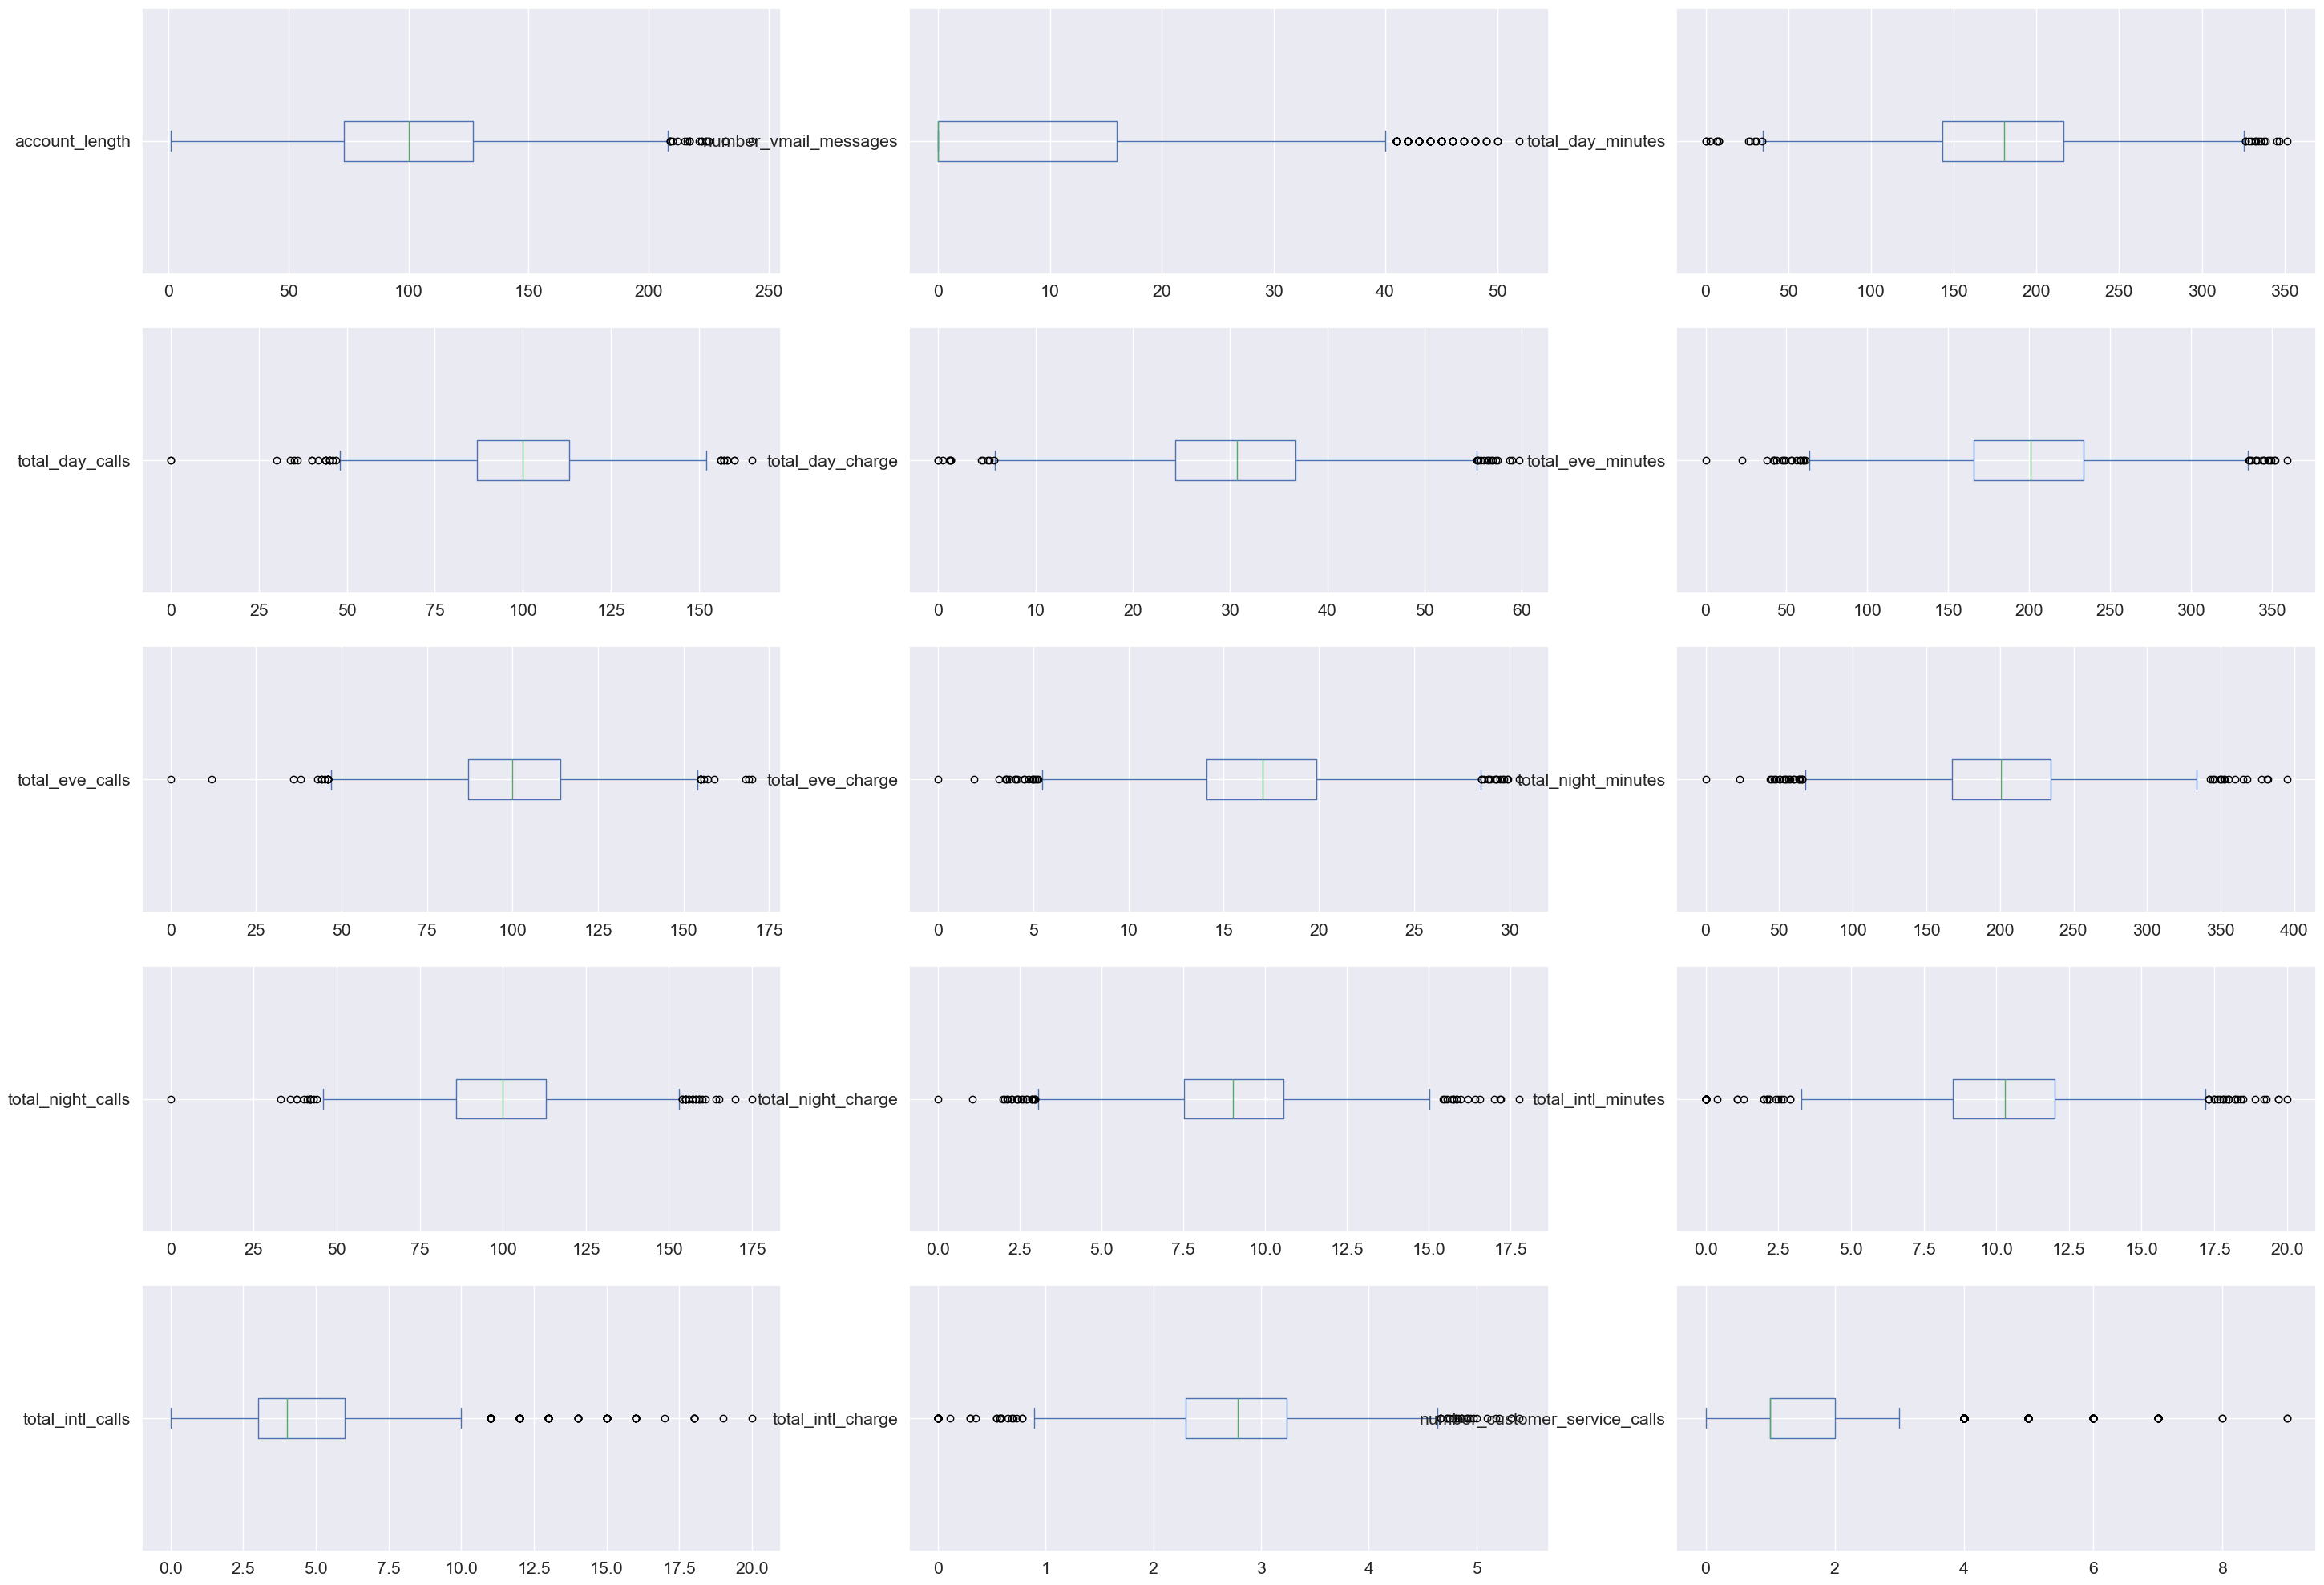

In [99]:
# Analysis numerical data
# Check data outlier
temp_data = dataset_train[numerical_col]

num = 1
plt.figure(figsize=(35, 25))
for col in numerical_col[0:-1]:
    plt.subplot(5, 3, num)
    temp_data[col].plot(kind='box', vert=False)
    num+=1


- Dari sebagian besar data numerik sebagian besar data berdistribusi normal, serta mengandung nilai outlier. namun disini nilai outlier disini tidak akan dibuang karena bisa menghilangkan informasi yang bermanfaat bagi pembelajaran model machine-learning.

In [100]:
# Check Correlations
corr_df = temp_data.corr()
corr_df

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,0.046647
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893,-0.012699


In [101]:
corr_df_target = corr_df['churn'].to_frame()

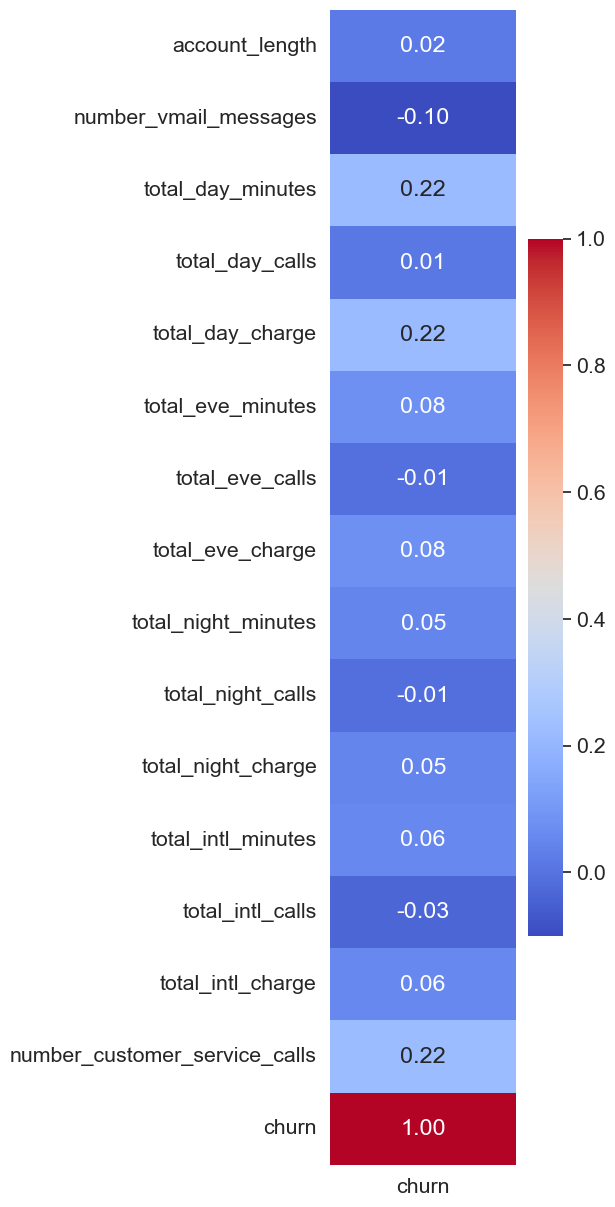

In [102]:
plt.figure(figsize = (3, 15))
corr_target_hm = sns.heatmap(
                corr_df_target, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm")

- Dari visualisasi diatas, tidak ada korelasi yang begitu signifikan antara feature dan target prediction.

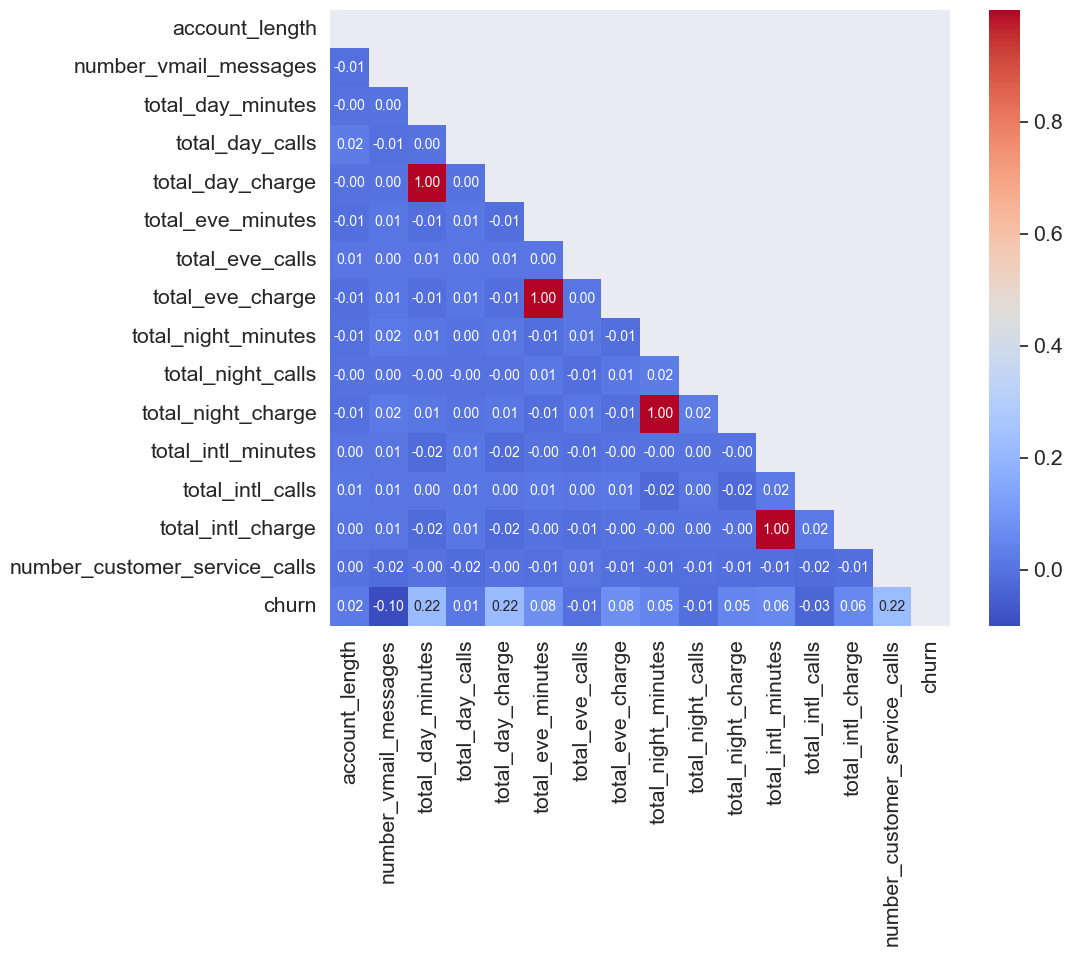

In [103]:
plt.figure(figsize = (10, 8))
corr_all_hm = sns.heatmap(
                corr_df, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm",
                mask=np.triu(np.ones_like(corr_df, dtype=bool)),
                annot_kws={"size": 10}
            )


- Kesuluruhan masing-masing kolom/feature tersebut terdapat 3 feature yang memiliki korelasi hubungan korelasi yang kuat dan yang lain tidak mempunyai hubungan korelasi antara 1 sama lain, oleh karena itu seluruh kolom/feature ini akan dilakukan analisa lebih lanjut dengan metode statistik lainnya seperti menghitung nilai mutual information. Selain itu perlu diketahui bahwa jika suatu feature memiliki nilai korelasi yang kuat dengan feature lainnya dan juga memiliki korelasi yang kuat dengan target prediksi maka ada sebaiknya melakukan drop pada feature tersebut karena hal tersbut dapat menimbulkan masalah multicollinearity dan dapat mengganggu kinerja model machine learning, namun jika feature tersebut memang penting dalam menjelaskan variabilitas dalam target prediksi dan tidak ada feature lain yang mampu menjelaskannya dengan baik, maka sebaiknya tidak menghapusnya.

## Feature Engineering

In [104]:
# Calculate WoE and IV
def woe_iv_values(dataframe:pd.DataFrame, feature:str, target:str):
    
    dataframe = pd.concat([dataframe.groupby(feature)[target].sum().reset_index(), dataframe.groupby(feature)[target].count().reset_index()], axis=1)
    dataframe = dataframe.iloc[:, [0,1, 3]]
    dataframe.columns = [dataframe.columns.values[0], 'n_good', 'n_observation']

    dataframe['n_bad'] = dataframe['n_observation'] - dataframe['n_good']
    dataframe['bad-rate_pct'] = round((dataframe['n_bad'] / dataframe['n_observation']) * 100, 3)
    dataframe['good_proportion'] = dataframe['n_good'] / dataframe['n_good'].sum()
    dataframe['bad_proportion'] = dataframe['n_bad'] / dataframe['n_bad'].sum()
    dataframe['WoE'] = np.log(dataframe['good_proportion'] / dataframe['bad_proportion'])
    dataframe['IV'] = (dataframe['good_proportion'] - dataframe['bad_proportion'] * dataframe['WoE']).sum()

    return dataframe

In [105]:
# WoE IV -> State
woe_iv_values(dataset_train, 'state', target='churn')

,state,n_good,n_observation,n_bad,bad-rate_pct,good_proportion,bad_proportion,WoE,IV
0,AK,4,61,57,93.443,0.006689,0.015608,-0.847317,1.091127
1,AL,13,101,88,87.129,0.021739,0.024096,-0.102948,1.091127
2,AR,11,71,60,84.507,0.018395,0.016429,0.112990,1.091127
3,AZ,7,77,70,90.909,0.011706,0.019168,-0.493146,1.091127
4,CA,10,39,29,74.359,0.016722,0.007941,0.744729,1.091127
5,CO,9,80,71,88.750,0.015050,0.019441,-0.256016,1.091127
6,CT,15,88,73,82.955,0.025084,0.019989,0.227030,1.091127
7,DC,8,72,64,88.889,0.013378,0.017525,-0.270002,1.091127
8,DE,13,80,67,83.750,0.021739,0.018346,0.169696,1.091127
9,FL,9,76,67,88.158,0.015050,0.018346,-0.198029,1.091127


In [106]:
categorical_col

['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [107]:
# WoE IV -> Area code
woe_iv_values(dataframe=dataset_train, feature='area_code', target='churn')

,area_code,n_good,n_observation,n_bad,bad-rate_pct,good_proportion,bad_proportion,WoE,IV
0,area_code_408,152,1086,934,86.004,0.254181,0.255750,-0.006156,1.001157
1,area_code_415,287,2108,1821,86.385,0.479933,0.498631,-0.038219,1.001157
2,area_code_510,159,1056,897,84.943,0.265886,0.245619,0.079288,1.001157


In [108]:
# WoE IV -> International plan
woe_iv_values(dataframe=dataset_train, feature='international_plan', target='churn')

,international_plan,n_good,n_observation,n_bad,bad-rate_pct,good_proportion,bad_proportion,WoE,IV
0,no,431,3854,3423,88.817,0.720736,0.937295,-0.262725,1.152587
1,yes,167,396,229,57.828,0.279264,0.062705,1.493711,1.152587


In [109]:
# WoE IV -> Voice mail plan
woe_iv_values(dataframe=dataset_train, feature='voice_mail_plan', target='churn')

,voice_mail_plan,n_good,n_observation,n_bad,bad-rate_pct,good_proportion,bad_proportion,WoE,IV
0,no,516,3138,2622,83.556,0.862876,0.717963,0.183854,1.071393
1,yes,82,1112,1030,92.626,0.137124,0.282037,-0.721155,1.071393


Rentang nilai Information Values (IV)
- Kurang dari 0,02: variabel memiliki prediksi yang buruk
- 0,02 sampai 0,1: variabel memiliki prediksi yang lemah
- 0,1 sampai 0,3: variabel memiliki prediksi yang sedang
- 0,3 sampai 0,5: variabel memiliki prediksi yang kuat
- Lebih dari 0,5: variabel memiliki prediksi yang sangat kuat

Namun perlu dikatahui jika nilai Information Value (IV) lebih besar atau sama dengan 1, maka memang sebaiknya diperiksa kembali karena nilai tersebut dianggap terlalu bagus untuk menjadi kenyataan atau "too good to be true". Dalam praktiknya, nilai IV yang sangat tinggi seperti ini jarang terjadi, terutama pada kasus yang kompleks atau data yang besar.

In [110]:
target_prediction = numerical_col[-1]
numerical_col.remove('churn')
categorical_col

['state', 'area_code', 'international_plan', 'voice_mail_plan']

In [111]:
print(target_prediction)
print(numerical_col)
print(categorical_col)

churn
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
['state', 'area_code', 'international_plan', 'voice_mail_plan']


In [112]:
# Calculate Mutual Information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(df_feature, target_prediction):
    mi_scores = mutual_info_regression(df_feature, target_prediction, random_state=42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=df_feature.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [113]:
mi_score = make_mi_scores(dataset_train.drop(labels=categorical_col+['churn'], axis=1), dataset_train['churn'])
mi_score

total_day_minutes                0.065532
total_day_charge                 0.062907
number_customer_service_calls    0.039430
number_vmail_messages            0.019183
total_day_calls                  0.008268
total_night_charge               0.007171
total_eve_calls                  0.006732
total_night_minutes              0.006661
total_eve_charge                 0.005527
total_intl_charge                0.005015
total_intl_calls                 0.004368
total_eve_minutes                0.001869
total_intl_minutes               0.001700
account_length                   0.000000
total_night_calls                0.000000
Name: MI Scores, dtype: float64

- Semakin tinggi nilai Mutual Information (MI), semakin banyak informasi yang dibagikan antara kedua variabel (informasi dalam feature terhadap target prediksi) dan semakin penting variabel tersebut dalam model.

- Dari berbagai hasil analisis statistik maka akan diambil kesimpulan bahwa feature kategorik tidak akan digunakan dan akan didrop.
- Selanjutnya berdasarkan hasil mutual information, akan dilakukan drop pada feature dengan nilai mutual information sama dengan 0

In [114]:
numerical_col = []

for i in range(len(mi_score)):
    if mi_score.values[i] > 0:
        numerical_col.append(mi_score.index[i])
 
numerical_col

['total_day_minutes',
 'total_day_charge',
 'number_customer_service_calls',
 'number_vmail_messages',
 'total_day_calls',
 'total_night_charge',
 'total_eve_calls',
 'total_night_minutes',
 'total_eve_charge',
 'total_intl_charge',
 'total_intl_calls',
 'total_eve_minutes',
 'total_intl_minutes']

In [115]:
# final dataset feature
dataset_train_final = dataset_train[list(numerical_col)+['churn']]
dataset_train_final

,total_day_minutes,total_day_charge,number_customer_service_calls,number_vmail_messages,total_day_calls,total_night_charge,total_eve_calls,total_night_minutes,total_eve_charge,total_intl_charge,total_intl_calls,total_eve_minutes,total_intl_minutes,churn
0,161.6,27.47,1,26,123,11.45,103,254.4,16.62,3.70,3,195.5,13.7,0
1,243.4,41.38,0,0,114,7.32,110,162.6,10.30,3.29,5,121.2,12.2,0
2,299.4,50.90,2,0,71,8.86,88,196.9,5.26,1.78,7,61.9,6.6,0
3,166.7,28.34,3,0,113,8.41,122,186.9,12.61,2.73,3,148.3,10.1,0
4,218.2,37.09,3,24,88,9.57,108,212.6,29.62,2.03,7,348.5,7.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,188.3,32.01,0,0,70,9.62,88,213.7,20.72,2.78,6,243.8,10.3,0
4246,177.9,30.24,3,0,89,8.38,82,186.2,11.15,3.11,6,131.2,11.5,0
4247,170.7,29.02,1,0,101,5.81,126,129.1,16.41,1.86,7,193.1,6.9,0
4248,235.7,40.07,2,40,127,13.39,126,297.5,18.96,2.67,5,223.0,9.9,0


## Model Selection

In [116]:
X = dataset_train_final.drop(['churn'], axis=1)
y = dataset_train_final['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2975, 13), (1275, 13), (2975,), (1275,))

In [117]:
X_train

,total_day_minutes,total_day_charge,number_customer_service_calls,number_vmail_messages,total_day_calls,total_night_charge,total_eve_calls,total_night_minutes,total_eve_charge,total_intl_charge,total_intl_calls,total_eve_minutes,total_intl_minutes
3044,221.0,37.57,1,0,94,10.49,72,233.2,26.20,2.73,5,308.2,10.1
2614,163.6,27.81,0,0,88,11.79,93,262.1,24.09,2.32,9,283.4,8.6
642,187.1,31.81,1,0,104,6.52,117,144.9,21.27,2.97,3,250.2,11.0
3001,195.2,33.18,5,30,123,9.95,115,221.0,10.74,2.43,5,126.4,9.0
3272,162.5,27.63,4,0,86,7.37,112,163.7,14.06,3.62,6,165.4,13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,216.7,36.84,1,0,70,8.15,102,181.2,12.98,3.13,6,152.7,11.6
420,186.6,31.72,1,24,69,10.57,116,234.9,18.87,3.13,5,222.0,11.6
3931,102.9,17.49,6,0,114,12.49,119,277.6,9.17,2.97,4,107.9,11.0
1918,202.3,34.39,1,28,97,11.59,84,257.6,5.88,1.81,3,69.2,6.7


In [118]:
y_train

3044    1
2614    0
642     0
3001    1
3272    1
       ..
3337    0
420     0
3931    1
1918    0
692     0
Name: churn, Length: 2975, dtype: int64

In [119]:
y_train.value_counts(), y_test.value_counts() 

(0    2556
 1     419
 Name: churn, dtype: int64,
 0    1096
 1     179
 Name: churn, dtype: int64)

In [120]:
handle_imbalance = RandomOverSampler(random_state=42)

In [121]:
scaler = ColumnTransformer([
    ('numerical_col', MinMaxScaler(), numerical_col)]
)

### Logistic Regression

- Model Logistic Reggression merupakan algoritma klasifikasi yang sederhana dan mudah diinterpretasikan, cocok untuk klasifikasi binomial dengan fitur numerik atau kategorikal.
Meskipun memiliki beberapa kelemahan, seperti asumsi linearitas dan keterbatasan untuk klasifikasi multi-kelas, regresi logistik tetap menjadi pilihan yang baik untuk banyak
masalah klasifikasi, terutama sebagai baseline untuk algoritma yang lebih kompleks.

In [122]:
logreg_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversample', handle_imbalance),
    ('logreg', LogisticRegression())
])

logreg_param = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__max_iter': [100, 150, 200],
    'logreg__class_weight': [None, 'balanced']
}

grid_search_logreg = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_param, cv=5, n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train, y_train)

print('Best parameters :', grid_search_logreg.best_params_)
print('Best Score :', grid_search_logreg.best_score_)

logreg_best_model = grid_search_logreg.best_estimator_
accuracy_train = logreg_best_model.score(X_train, y_train)
accuracy_test = logreg_best_model.score(X_test, y_test)

print('Accuracy on data train : ', accuracy_train)
print('Accuracy on data test : ', accuracy_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Best parameters : {'logreg__C': 1, 'logreg__class_weight': None, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best Score : 0.7307563025210084
Accuracy on data train :  0.7347899159663865
Accuracy on data test :  0.7176470588235294


In [123]:
y_pred = logreg_best_model.predict(X_test)
y_pred_proba = logreg_best_model.predict_proba(X_test)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

print(result_report)

              precision    recall  f1-score   support

           0       0.94      0.72      0.81      1096
           1       0.29      0.72      0.42       179

    accuracy                           0.72      1275
   macro avg       0.62      0.72      0.62      1275
weighted avg       0.85      0.72      0.76      1275



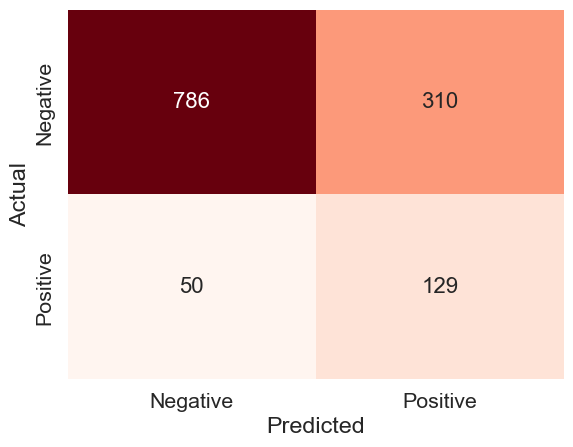

In [124]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

### Feature Importance - Logistic Regression Model

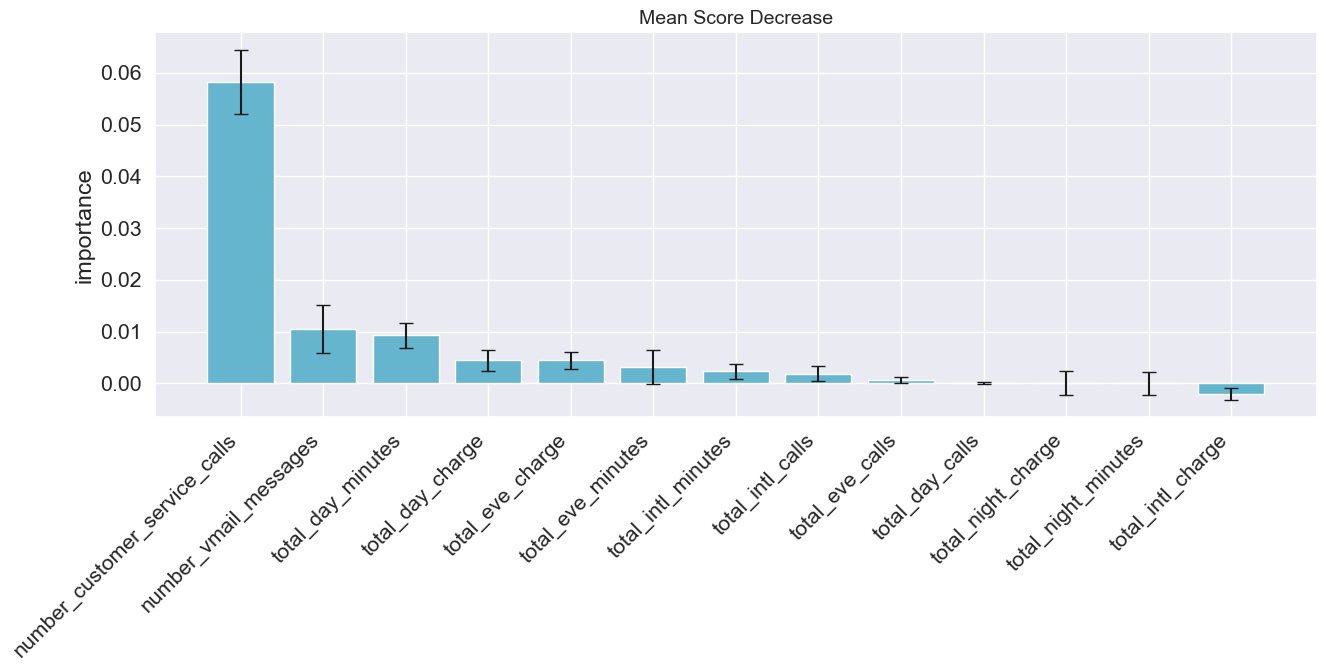

In [125]:
from jcopml.feature_importance import mean_score_decrease

feature_importance = mean_score_decrease(X_train=X_train, y_train=y_train, model=logreg_best_model, plot=True)

### Random Forest

- Random Forest adalah metode klasifikasi yang menggabungkan kekuatan beberapa Decision Trees untuk menghasilkan prediksi yang lebih baik. Dalam proses ini, algoritma
mengurangi varians dan overfitting yang mungkin terjadi pada Decision Trees tunggal.

In [126]:
rf_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversample', handle_imbalance),
    ('rf', RandomForestClassifier(random_state=42))
])

rf_param = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_pipe, param_grid=rf_param, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best param : ", grid_search_rf.best_params_)
print("Best Score : ", grid_search_rf.best_score_)

rf_best_model = grid_search_rf.best_estimator_
accuracy_train = rf_best_model.score(X_train, y_train)
accuracy_test = rf_best_model.score(X_test, y_test)

print('Accuracy on data train : ', accuracy_train)
print('Accuracy on data test : ', accuracy_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best param :  {'rf__bootstrap': False, 'rf__max_depth': 30, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best Score :  0.9310924369747899
Accuracy on data train :  1.0
Accuracy on data test :  0.9356862745098039


In [127]:
y_pred = rf_best_model.predict(X_test)
y_pred_proba = rf_best_model.predict_proba(X_test)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

print(result_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1096
           1       0.97      0.56      0.71       179

    accuracy                           0.94      1275
   macro avg       0.95      0.78      0.84      1275
weighted avg       0.94      0.94      0.93      1275



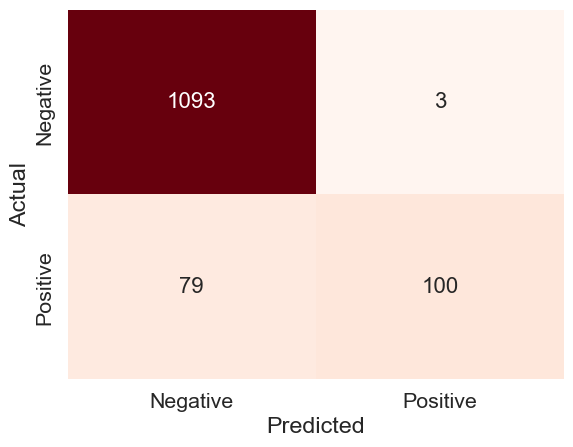

In [128]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

### Feature Importance - Random Forest

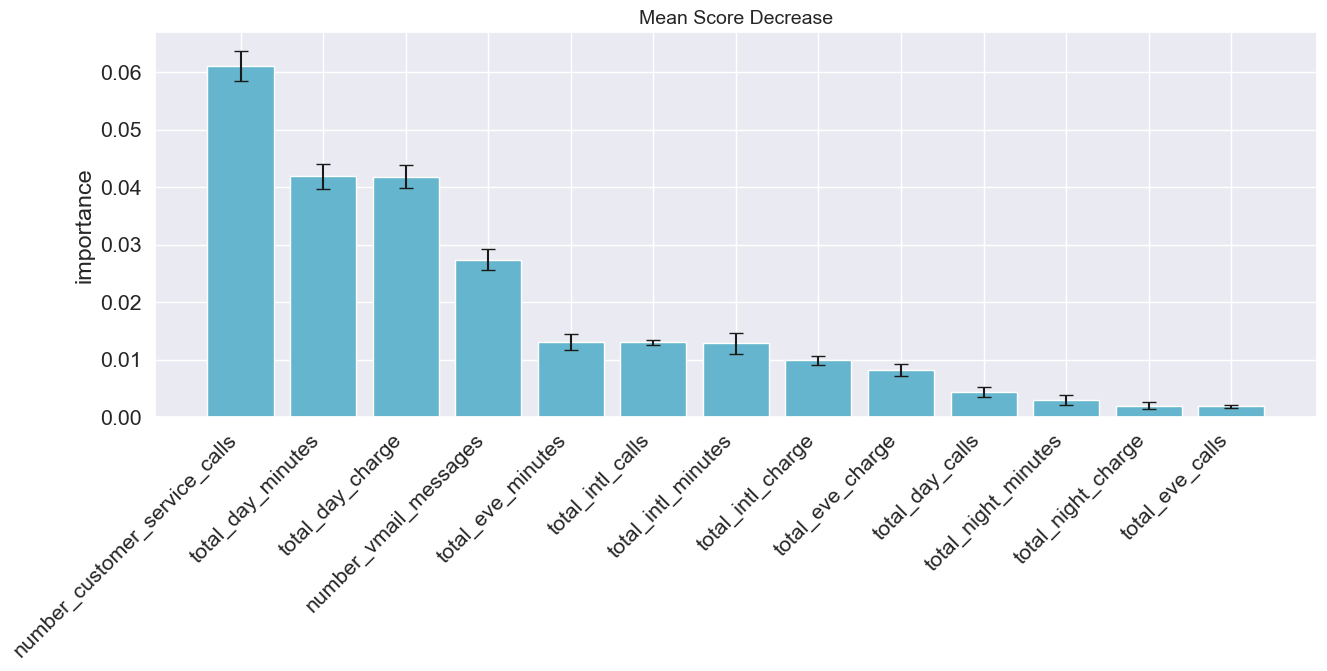

In [129]:
feature_importance = mean_score_decrease(X_train=X_train, y_train=y_train, model=rf_best_model, plot=True)

### KNN 

- K-Nearest Neighbors (KNN) adalah algoritma pembelajaran mesin yang digunakan untuk masalah klasifikasi dan regresi. Algoritma ini bekerja berdasarkan prinsip "kemiripan".
Dalam konteks klasifikasi, objek baru akan diklasifikasikan berdasarkan mayoritas kelas dari k-tetangga terdekatnya. Model ini cocok untuk mengatasi data non linear dan jumlah fitur yang sedikit.

In [130]:
knn_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversampling', handle_imbalance),
    ('knn', KNeighborsClassifier())]
)

knn_param = {
    'knn__n_neighbors': [5, 7, 10],
    'knn__weights':['uniform', 'distance'],
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn_pipe, param_grid=knn_param, cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print('Best param : ', grid_search_knn.best_params_)
print('Best Score : ', grid_search_knn.best_score_)

knn_best_model = grid_search_knn.best_estimator_

print('Accuracy on data train : ', knn_best_model.score(X_train, y_train))
print('Accuracy on data test : ', knn_best_model.score(X_test, y_test))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best param :  {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'distance'}
Best Score :  0.7956302521008404
Accuracy on data train :  1.0
Accuracy on data test :  0.8031372549019608


In [131]:
y_pred = knn_best_model.predict(X_test)
y_pred_proba = knn_best_model.predict_proba(X_test)
result_report = classification_report(y_true=y_test, y_pred=y_pred)

print(result_report)

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1096
           1       0.38      0.65      0.48       179

    accuracy                           0.80      1275
   macro avg       0.66      0.74      0.68      1275
weighted avg       0.86      0.80      0.82      1275



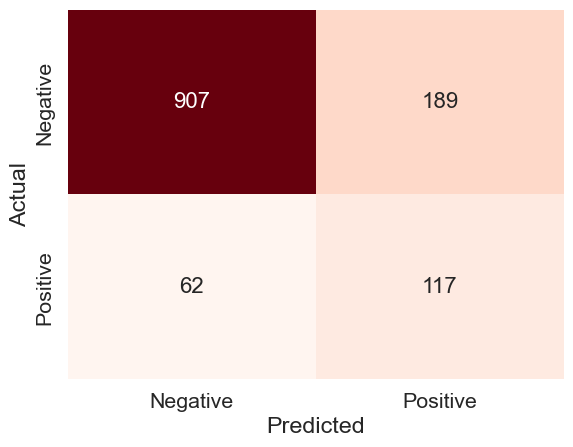

In [132]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

### KNN - Feature Importance

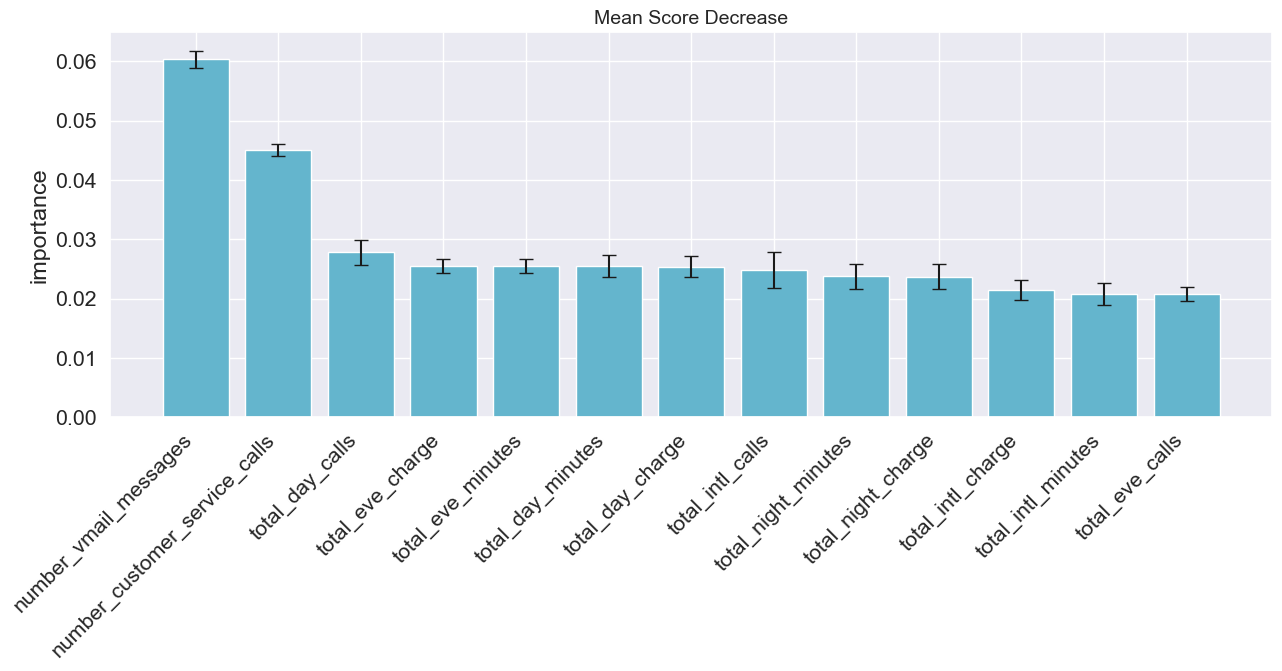

In [133]:
feature_importance = mean_score_decrease(X_train=X_train, y_train=y_train, model=knn_best_model, plot=True)

### Support Vector Machine

- Support Vector Machines (SVM) merupakan algoritma klasifikasi yang kuat dan fleksibel, yang bekerja dengan mencari hyperplane terbaik yang memisahkan data menjadi dua kelas
atau lebih. SVM sangat efektif dalam mengatasi masalah klasifikasi linear dan non-linear

In [134]:
svm_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversampling', handle_imbalance),
    ('svm', svm.SVC(probability=True))
])

svm_param = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=svm_pipe, param_grid=svm_param, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

print("Best param : ", grid_search_svm.best_params_)
print("Best Score : ", grid_search_svm.best_score_)

svm_best_model = grid_search_svm.best_estimator_

print('Accuracy on data train : ', svm_best_model.score(X_train, y_train))
print('Accuracy on data test : ', svm_best_model.score(X_test, y_test))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best param :  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Score :  0.8739495798319329
Accuracy on data train :  0.9230252100840336
Accuracy on data test :  0.8807843137254902


In [135]:
y_pred = svm_best_model.predict(X_test)
y_pred_proba = svm_best_model.predict_proba(X_test)
result_report = classification_report(y_true=y_test, y_pred=y_pred)

print(result_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1096
           1       0.56      0.69      0.62       179

    accuracy                           0.88      1275
   macro avg       0.75      0.80      0.77      1275
weighted avg       0.89      0.88      0.89      1275



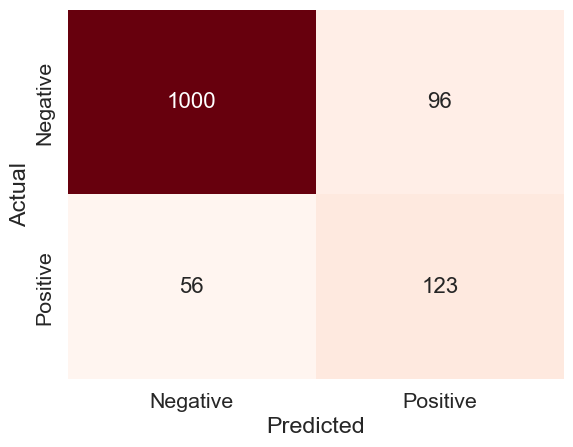

In [136]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

### Feature Importance - SVM

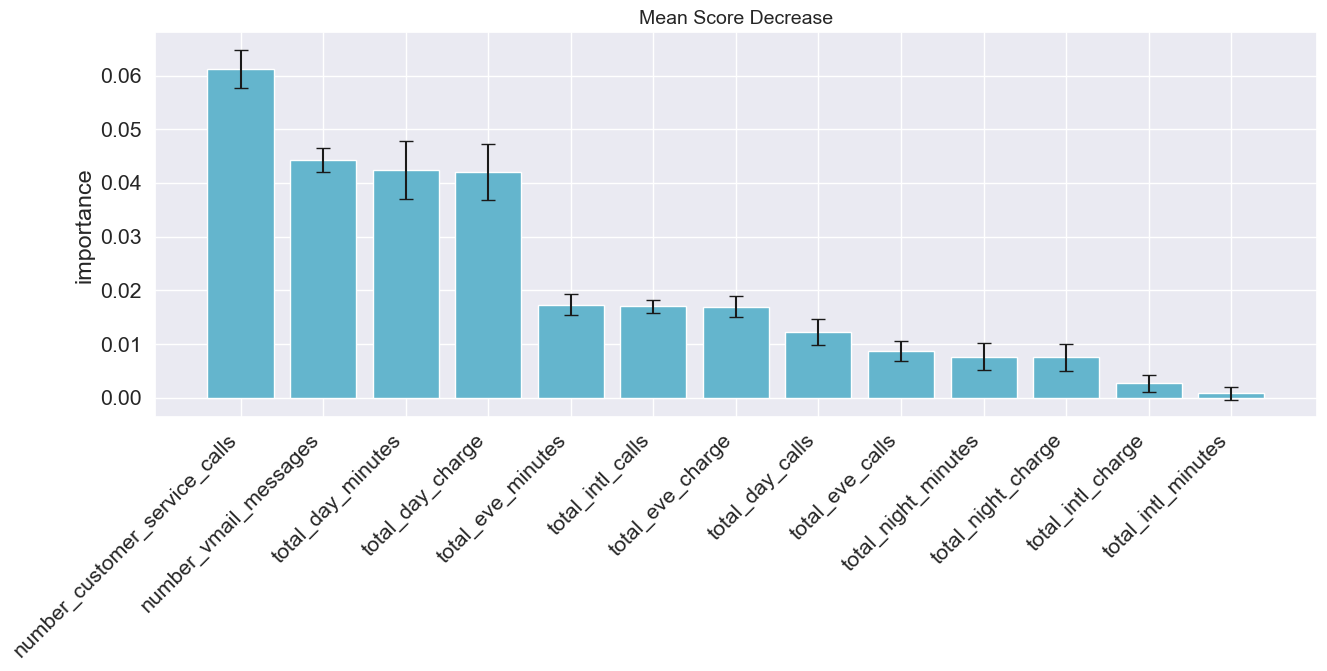

In [137]:
feature_importance = mean_score_decrease(X_train=X_train, y_train=y_train, model=svm_best_model, plot=True)

### ROC_AUC Graf

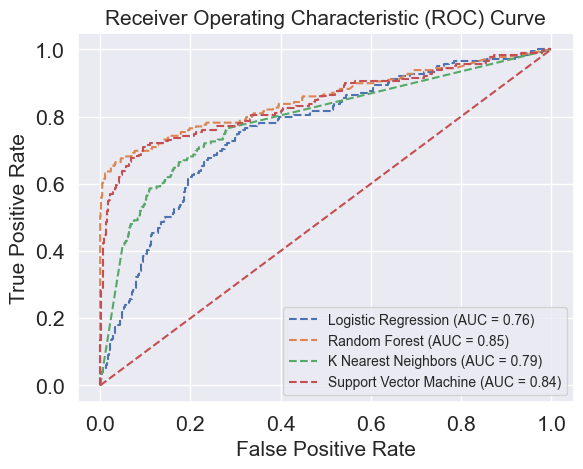

In [138]:
# predict probabilities
logreg_probs = logreg_best_model.predict_proba(X_test)[:, 1]
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
knn_probs = knn_best_model.predict_proba(X_test)[:, 1]
svm_probs = svm_best_model.predict_proba(X_test)[:, 1]

# calculate roc curves and auc scores
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

plt.plot(logreg_fpr, logreg_tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K Nearest Neighbors (AUC = %0.2f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine (AUC = %0.2f)' % svm_auc)

# plot the random line
plt.plot([0, 1], [0, 1], linestyle='--', color='r')

# set the axis labels and title
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# show the legend and plot the figure
plt.legend(fontsize=10)
plt.show()

- Dari ke-4 model machine learning sebelumnya dan dengan membandingkan hasil akurasi serta grafik roc_auc maka dapat disimpulan bahwa model SVM menghasilkan performa yang paling baik sehingga model ini akan dipilih untuk melakukan prediksi pada data baru nantinya. Untuk model Random Forest, walaupun memilik score roc_auc yang bagus namun pada hasil score akurasi data train dan test masih terdapat overfit.

# Import new data to predict

In [139]:
new_data = pd.read_csv('E:\Data Science\Python\project data science\FGA KOMINFO final_project\data_set\Data Test.csv')

In [140]:
dataset_test = new_data[numerical_col]

In [141]:
dataset_test

,total_day_minutes,total_day_charge,number_customer_service_calls,number_vmail_messages,total_day_calls,total_night_charge,total_eve_calls,total_night_minutes,total_eve_charge,total_intl_charge,total_intl_calls,total_eve_minutes,total_intl_minutes
0,265.1,45.07,1,25,110,11.01,99,244.7,16.78,2.70,3,197.4,10.0
1,223.4,37.98,0,0,98,9.18,101,203.9,18.75,1.70,6,220.6,6.3
2,120.7,20.52,4,0,70,9.14,76,203.0,26.11,3.54,6,307.2,13.1
3,190.7,32.42,3,0,114,5.83,111,129.6,18.55,2.19,3,218.2,8.1
4,124.3,21.13,3,0,76,11.28,112,250.7,23.55,4.19,5,277.1,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,119.4,20.30,0,0,99,9.12,97,202.7,19.24,3.05,7,226.3,11.3
746,177.2,30.12,3,0,118,10.88,84,241.8,22.99,3.32,2,270.5,12.3
747,184.2,31.31,3,0,90,9.61,73,213.6,21.83,3.97,2,256.8,14.7
748,140.6,23.90,1,0,89,9.56,128,212.4,14.69,3.67,4,172.8,13.6


In [142]:
dataset_test.shape

(750, 13)

In [143]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   total_day_minutes              750 non-null    float64
 1   total_day_charge               750 non-null    float64
 2   number_customer_service_calls  750 non-null    int64  
 3   number_vmail_messages          750 non-null    int64  
 4   total_day_calls                750 non-null    int64  
 5   total_night_charge             750 non-null    float64
 6   total_eve_calls                750 non-null    int64  
 7   total_night_minutes            750 non-null    float64
 8   total_eve_charge               750 non-null    float64
 9   total_intl_charge              750 non-null    float64
 10  total_intl_calls               750 non-null    int64  
 11  total_eve_minutes              750 non-null    float64
 12  total_intl_minutes             750 non-null    flo

In [148]:
data_test_predict = svm_best_model.predict(new_data)
data_test_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [149]:
dataset_test['id'] = new_data['id']
dataset_test['churn'] = data_test_predict

C:\Users\09021\AppData\Local\Temp\ipykernel_22576\2621575307.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\09021\AppData\Local\Temp\ipykernel_22576\2621575307.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
dataset_test

,total_day_minutes,total_day_charge,number_customer_service_calls,number_vmail_messages,total_day_calls,total_night_charge,total_eve_calls,total_night_minutes,total_eve_charge,total_intl_charge,total_intl_calls,total_eve_minutes,total_intl_minutes,id,churn
0,265.1,45.07,1,25,110,11.01,99,244.7,16.78,2.70,3,197.4,10.0,1,0
1,223.4,37.98,0,0,98,9.18,101,203.9,18.75,1.70,6,220.6,6.3,2,0
2,120.7,20.52,4,0,70,9.14,76,203.0,26.11,3.54,6,307.2,13.1,3,1
3,190.7,32.42,3,0,114,5.83,111,129.6,18.55,2.19,3,218.2,8.1,4,0
4,124.3,21.13,3,0,76,11.28,112,250.7,23.55,4.19,5,277.1,15.5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,119.4,20.30,0,0,99,9.12,97,202.7,19.24,3.05,7,226.3,11.3,746,0
746,177.2,30.12,3,0,118,10.88,84,241.8,22.99,3.32,2,270.5,12.3,747,0
747,184.2,31.31,3,0,90,9.61,73,213.6,21.83,3.97,2,256.8,14.7,748,0
748,140.6,23.90,1,0,89,9.56,128,212.4,14.69,3.67,4,172.8,13.6,749,0


In [151]:
chrun_prop = dataset_test['churn'].value_counts().to_frame()
fig = px.bar(data_frame=chrun_prop, x=chrun_prop.index, y='churn', color=['Not_churn', 'Churn'])
fig.update_layout(
    width=700, 
    height=600, 
    legend=dict(title=' '),
    xaxis=dict(tickvals=[0,1], ticktext=['Not Churn', 'Churn'], title='Status', title_font=dict(size=20)),
    yaxis=dict(title='Total Counts', title_font=dict(size=20))
)
fig.update_traces(
    hovertemplate='Status: %{x}<br>Total Counts: %{y}',
)
fig.show()

- Dari hasil prediksi data baru menggunkan best model machine learning didapatkan hasil dari sebanyak 750 data customer baru terdapat sebanyak 129 customer yang memiliki resiko untuk churn sedangkan 621 diantaranya tidak churn.